In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

The biggest advantage of this algorithm over K-Means and MeanShift is that it is robust to outliers meaning it will not include outliers data points in any cluster

DBSCAN algorithms require only two parameters from the user:
* The radius of the circle to be created around each data point, also known as `epsilon`
* `minPoints` which defines the minimum number of data points required inside that circle for that data point to be classified as a Core point.

Every data point is surrounded by a circle with a radius of epsilon, and DBSCAN identifies them as being either a Core point, Border point, or Noise point.

It works great on non-linear datasets and can be used for anomaly detection as it separates out the noise points and do not assign them to any cluster.

K-Means algorithm clusters all the instances in the datasets whereas DBSCAN doesn’t assign noise points (outliers) to a valid cluster

In [2]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


The first step is to verify is Null or missing values are present. If yes, then umputing or deleting of these
values must be carried out

In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Now, label encoding should be applied on the categorical features

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

columns_to_encode = ['mainroad', 'guestroom', 'basement',
                     'hotwaterheating', 'airconditioning',
                     'prefarea']

encode = lambda feature: label_encoder.fit_transform(feature)

df[columns_to_encode] = df[columns_to_encode].apply(encode)

# custom encoding for the column 'furnishingstatus'
encoding_dict = {'furnished': 2,
                 'semi-furnished': 1,
                 'unfurnished': 0}

df['furnishingstatus'] = df['furnishingstatus'].map(encoding_dict)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


Seeking for outliers or correlation trends among the different features.
From the plots, we can see that there are not outliers.

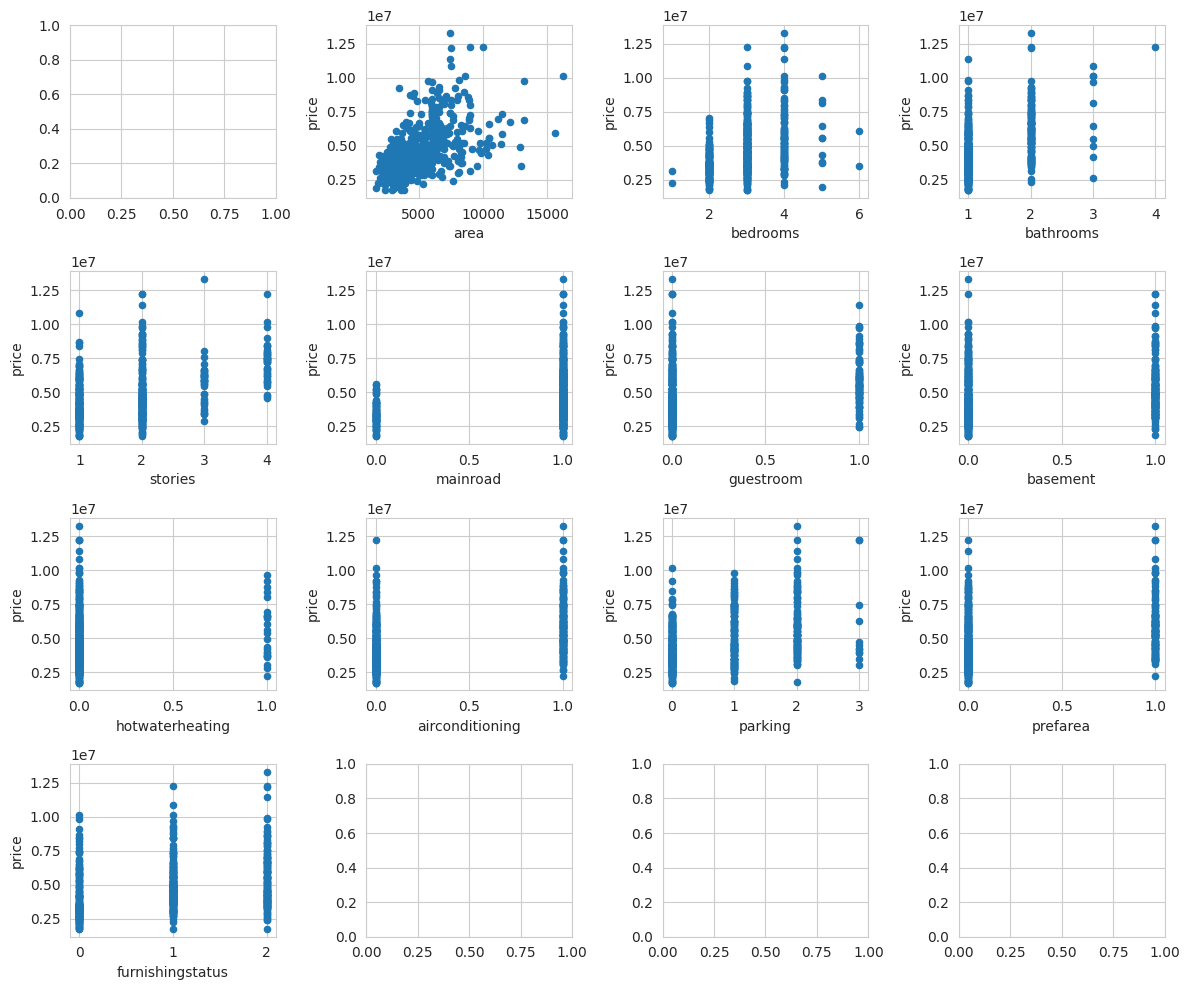

In [42]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))  # Create a 4x4 grid of subplots
for i, column in enumerate(df.columns):
    if column != "price":
        ax = axs[i//4, i%4]  # Get the appropriate subplot
        df.plot.scatter(x=column, y="price", ax=ax)  # Plot scatter for each column

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [43]:
# For now, we can focus on the features 'price' and 'area', in order to determine if clusters are present

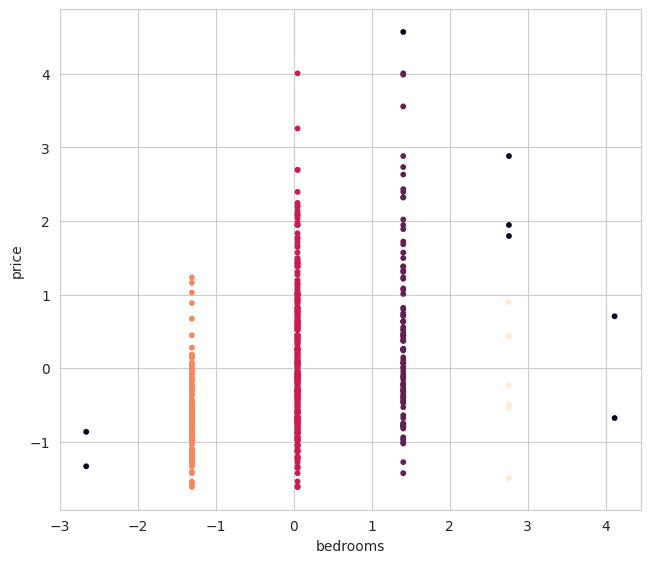

In [77]:
X = df[['bedrooms', 'price']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clusters = DBSCAN(eps=1.0, min_samples=5).fit_predict(X_scaled)

plt.figure(figsize=(7.5, 6.5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=10)

plt.xlabel("bedrooms")
plt.ylabel("price")

plt.show()

In [76]:
# print values for each sample
clusters

array([-1, -1, -1, -1,  0,  1,  0, -1,  0,  1,  1,  0,  0,  0,  1,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0,  1,
       -1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  2,  0,  0,  1,  1,  2,  1,
        1,  0,  1,  0,  1,  2,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  2,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  1,  1,  0,  1,  0,  0,  1,  1, -1,  1,  2,  1,  1,  0,  1,
        1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  0,  1,  1,  1,  0,  0,  3,  0,  1,  2,  1,  1,  0,  1,  0,  3,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  2,  0,  0,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  2,
        1,  2,  2,  0,  1,  1,  2,  1,  0,  1,  1,  1,  1,  1,  1,  2,  0,
        1,  1,  2,  1,  1,  1,  1,  1,  0,  0,  2,  1,  1,  1,  2,  1,  0,
        0,  2,  1,  2,  2